Opening the combined file

In [2]:
import os
os.getcwd()

'/Users/leyla/Documents/Education/Imperial/MSc Environmental Technology/Research project/Data analysis'

In [3]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataset=Dataset("balticseawaveforecast.nc", 'r')
print (dataset.variables.keys())

dict_keys(['time', 'VTPK', 'lon', 'VHM0', 'VMDR', 'lat'])


In [5]:
lon=dataset['lon']
lat=dataset['lat']
wave_height=dataset['VHM0']
wave_from_direction=dataset['VMDR']
wave_period=dataset['VTPK']

In [6]:
print (lon)
print (lat)
print (wave_height)
print (wave_from_direction)
print (wave_period)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    _FillValue: nan
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    _ChunkSizes: 764
    _CoordinateAxisType: Lon
    valid_min: 14.013747
    valid_max: 20.18024
unlimited dimensions: 
current shape = (223,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    _FillValue: nan
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    _ChunkSizes: 775
    _CoordinateAxisType: Lat
    valid_min: 53.374943
    valid_max: 55.724846
unlimited dimensions: 
current shape = (142,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 VHM0(time, lat, lon)
    _FillValue: nan
    long_name: Spectral significant wave height (Hm0)
    standard_name: sea_surface_wave_significant_height
    units: m
    _ChunkSizes: [  4 481 474]
unlimited dimensions: 
current shape = (8761, 142, 223)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 VMDR(time, la

In [7]:
wave_height=wave_height[:]
print (wave_height.shape)

(8761, 142, 223)


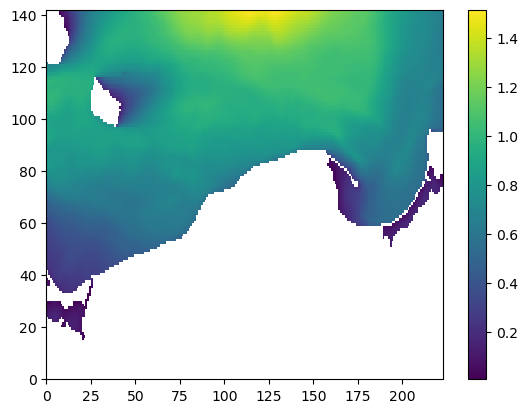

In [8]:
# Plot first day #
plt.pcolormesh(wave_height[0])
plt.colorbar()
plt.show()

In [11]:
wave_power = 0.5 * (wave_height)**2 * wave_period
print (wave_power.shape)

(8761, 142, 223)


(142, 223)


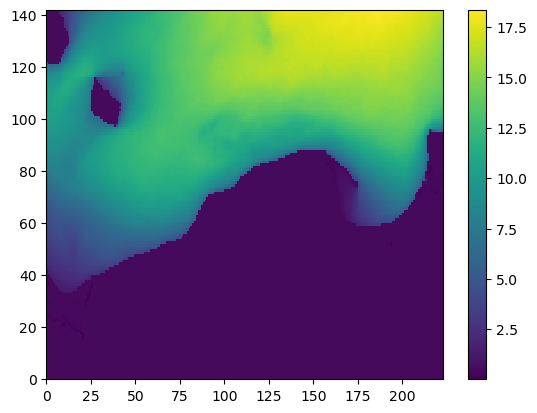

In [41]:
# Calculate 90th percentile #
pc90_wp=np.nanpercentile(wave_power,q=90,axis=0)
print (pc90_wp.shape)
pc90_wp[pc90_wp<-1E3]=0
plt.pcolormesh(pc90_wp)
plt.colorbar()
plt.show()

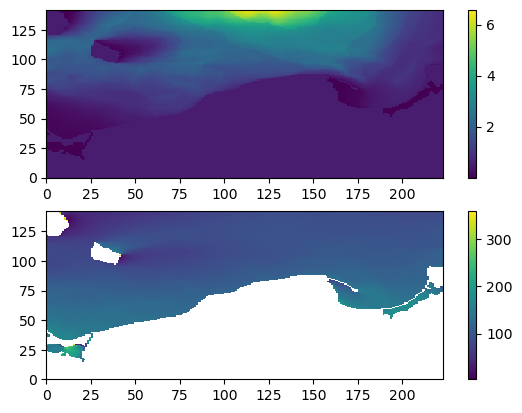

In [42]:
# Extract extreme windn values #
wave_power_xtrms=np.copy(wave_power)
# wave_power_xtrms[wave_power<pc90_wp]=0
# wave_power_xtrms[np.logical_or(wave_power<pc90_wp, np.isnan(wave_power))] = 0

wave_from_direction_xtrms=np.copy(wave_from_direction)
# wave_from_direction_xtrms[wave_power<pc90_wp]=0

#wind_speed_xtrms=np.ma.masked_where(wind_speed_xtrms<=0,wind_speed_xtrms)
#wind_to_dir_xtrms=np.ma.masked_where(wind_to_dir_xtrms<=0,wind_to_dir_xtrms)

plt.subplot(211)
plt.pcolormesh(wave_power_xtrms[0])
plt.colorbar()

plt.subplot(212)
plt.pcolormesh(wave_from_direction_xtrms[0])
plt.colorbar()
plt.show()

In [43]:
# Prepare to export data #
wave_power_xtrms_flatten=wave_power_xtrms.flatten()
wave_from_direction_xtrms_flatten=wave_from_direction_xtrms.flatten()
print (wave_power_xtrms_flatten.shape)
lon_flatten=np.tile(lon,wave_power.shape[0]*wave_power.shape[1])
lat_flatten=np.tile(lat,wave_power.shape[0]*wave_power.shape[2])
print (lon_flatten.shape)
print (lat_flatten.shape)

(277425826,)
(277425826,)
(277425826,)


In [ ]:
# Export data to csv #
header=['lon','lat','wave_power','wave_from_direction']
file=open('balticsea_extremewave.csv', 'w', encoding='UTF8', newline='')
file.write("lon, lat, wave_power, wave_from_direction \n")
for i in range(wave_power.size):
   # print (100.0*i/wave_power.size)
    if wave_power_xtrms_flatten[i] <= 0 or np.isnan(wave_from_direction_xtrms_flatten[i]):
        continue
    else:
        file.write("{0}, {1}, {2}, {3} \n".format(lon_flatten[i],lat_flatten[i],wave_power_xtrms_flatten[i],wave_from_direction_xtrms_flatten[i]))
file.close()